In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 13 13:14:04 2021

@author: Owner
"""
import numpy as np
from random import shuffle
import time
suitsDict = {"Spades":0,"Hearts":1,"Clubs":2,"Diamonds":3,0:"Spades",1:"Hearts",2:"Clubs",3:"Diamonds"}
ranks = ("Two","Three","Four","Five","Six","Seven","Eight","Nine","Ten","Jack","Queen","King","Ace")
MODEL_NAME = f"model-{int(time.time())}"

class Card:
    def __init__(self,value,suit,rank):
        self.value = value
        self.suit = suit
        self.rank = rank
        try:
            self.index = suitsDict[suit]*13+value-1
        except KeyError:
            self.index = 0
    def getKey(self):
        return str(suitsDict[self.suit])+str(self.index)
        #return self.index
    
joker = Card(10.5,"None","Joker")    

def order(card):
      return card.getKey()
def sort(deck):
    return sorted(deck,key = order)
def oneHot(position,size):
    vector = np.zeros(size)
    vector[position] = 1
    return vector
def percentage(position, size):
    pass
    

def buildDeck():
    deck = []
    for j in range(4):
        for i in np.arange(2,15):
            deck.append(Card(i,suitsDict[j],ranks[i-2]))
    deck.append(joker)
    return deck
        
def printDeck(deck):    
    for i in range(len(deck)):
        if deck[i] is joker:
            print("Joker")
        else:
            print(deck[i].rank+" of "+ deck[i].suit)
            
def decktoString(deck):
    output = ""
    for i in range(len(deck)):
        if deck[i] is joker:
            output +=  "Joker\n"
        else:
            output += deck[i].rank+" of "+ deck[i].suit + "\n"
    return output
    
def convertCards(cards):
    try:
        newCards = np.zeros(53)
        for card in cards:
            newCards[card.index] = 1
        return newCards
    except IndexError:
        print(card.index,type(card),card,"This is the problem")
        printDeck(card)
        newCards[card.index] = 1
        
def compare(trick,trump):
    #First card in trick is suit led
    suitLed = trick[0].suit
    power = []
    for card in trick:
        if card.suit == trump or card.suit == "None":
            power.append(card.value*100)
        elif card.suit == suitLed:
            power.append(card.value)
        else:
            power.append(0)
    high = -1
    index = -1
    for i in range(len(power)):
        if power[i] > high:
            high = power[i]
            index = i
    return power, index

def isWinner(score):
    high = 10
    index = -1
    tie = False
    
    for i in range(len(score)):
        if score[i] > high:
            index = i
            high = score[i]
            tie = False
        elif score[i] == high and index != -1:
            tie = True
            
    return (index != -1),index,tie

def getSuit(suit,isTrump = False):
    deck = buildDeck()
    try:
        cards = deck[suitsDict[suit]*13:suitsDict[suit]*13+13]
        if isTrump:
            cards.append(deck[52])
        return convertCards(cards)
    except TypeError:
        print(suitsDict[suit]*13,suitsDict[suit]*13,13)
        print(suitsDict,suit)
def convertSuit(suit):
    return suitsDict[suit]

In [2]:
helper = buildDeck()
print([u.index for u in helper])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 0]


In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib import style
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim

class Smear():
    def __init__(self):
        self.bidding = bidNet()
        self.playing = playNet()
        self.optBid = optim.Adam(self.bidding.parameters(), lr=0.001)
        self.optPlay = optim.Adam(self.playing.parameters(), lr=0.001)
class bidNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(60, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 11)
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        return f.softmax(x, dim=1)
class playNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(167, 32).double()
        self.fc2 = nn.Linear(32, 32).double()
        self.fc3 = nn.Linear(32, 32).double()
        self.fc4 = nn.Linear(32, 54).double()
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.fc4(x)
        return f.softmax(x, dim=1)
    
loss_function = nn.BCEWithLogitsLoss()
EPOCHS = 100

import time

style.use("ggplot")
model_name = MODEL_NAME #reference the MODEL_NAME if you're in a notebook still.

def smooth(data, num):
    new = []
    for i in range(num,len(data)):
        new.append(sum(data[i-num:i])/num)
    return new

def create_acc_loss_graph(model_name):
    contents = open("SecondModel.log", "r").read().split("\n")

    times = []
    lossesA= []
    lossesB = []
    countr = 0
    totl = 0
    wons = []
    scoress = []

    for c in contents:
        if model_name in c:
            name, timestamp, lossA, lossB, won, scoreSum = c.split(",")

            times.append(float(timestamp))
            lossesA.append(float(lossA))
            lossesB.append(float(lossB))
            if(bool(won)):
                countr+=1
            totl += 1 
            wons.append(countr/totl)
            scoress.append(scoreSum)


    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(range(len(lossesA)-5), smooth(lossesA,5), label="Player1")
    ax1.plot(range(len(lossesB)-5), smooth(lossesB,5), label="Player2")
    ax1.legend(loc=2)
    plt.show()
    #print(wons)



In [4]:
def fwd_pass(bots,train=True): 
    if train:
        for i in range(2):
            bots[i].playing.zero_grad()
            bots[i].bidding.zero_grad()
    else:
        torch.no_grad()
    '''Initialization'''
    deck = buildDeck()
    reference = deck.copy()
    shuffle(deck)
    player = [[],[]]
    trick = [[],[]]
    score = [0,0]
    info = [[],[]]
    outputs = [[],[]]
    record = "start:\n"
    suit = -1
    index = -1
    '''Dealing Cards'''
    for i in range(2):
        for j in range(len(player)):
            for k in range(3):
                player[j].append(deck.pop(0))
    '''
    Bidding:
    Hand'
    Bids so far
    order
    '''
    bid = -1
    for i in range(len(bots)):
        temp = convertCards(player[i])
        if bid == -1:
            temp = np.insert(temp,53,np.zeros(6))
        else:
            temp = np.insert(temp,53,oneHot(bid,6))
        temp = np.insert(temp,59,i/len(player))
        info[i].append(temp)
        outputs[i].append(bots[i].bidding(torch.Tensor(temp).view(-1,60)))
        tempBid = torch.argmax(outputs[i][0][0][:6])
        if tempBid > bid:
            bid = tempBid
            index = i
            suit = torch.argmax(outputs[i][0][0][6:10])
        record += decktoString(player[i])
        record += str(tempBid)+"\n\n"
    bidWinner = index
    '''Redeal'''
    trump = convertSuit(suit.item())
    record += str(bidWinner) + " "+ trump + "\n\n"
    suitsDict["None"] = suitsDict[trump]
    trash = []
    redeal = [0,0]
    x = 0
    for hand in player:
        for i in range(len(hand)):
            if(hand[i].suit != trump and hand[i].suit != "None"):
                trash.append(hand.pop(i))
                hand.insert(i,deck.pop(0))
                redeal[x] += 1
        x+=1
        record += decktoString(hand)+"\n"
    for i in range(len(player)):
        player[i] = sort(player[i])
    '''Find High and Low'''
    highValue = -1
    highPlayer = -1
    lowValue = 2000
    lowPlayer = -1
    pointsTaken = []
    for i in range(len(player)):
        for card in player[i]:
            if (card.suit == trump or card.suit == "None") and card.value < lowValue:
                lowValue = card.value
                lowPlayer = i
                #print(lowValue)
            if (card.suit == trump or card.suit == "None") and card.value > highValue:
                highValue = card.value
                highPlayer = i
                #print(highValue)


    lead = index
    #print("Player",lead + 1,"leads")
    #print()


    '''
    What's been played 53
    What was led 53
    points available 1 percent (IGNORED)
    Whose lead 1 percent ()
    how many points to bid 1 percent (IGNORED)
    broken suit 4 y\n (IGNORED)
    what is trump 4 y\n 
    hand 53
    difference of trump vs opponent 1 percent of difference
    points of players n (IGNORED)
    round points n 
    how much game n (2) 
    '''

    #Play
    tempLog = str(trump)+" "+str(bidWinner)+" "+str(bid)+"\n"
    choice = -1
    game = [0,0]
    
    for j in range(6):
        turn = []

        for i in range(len(player)):
            temp = (convertCards([c for player in trick for cards in player for c in cards]))
            temp = np.insert(temp,53,convertCards([t for t in turn]))
            temp = np.insert(temp,106,[i/len(player)])
            temp = np.insert(temp,107,oneHot(suitsDict[trump],4))
            temp = np.insert(temp,111,convertCards(player[(i+lead)%2]))
            temp = np.insert(temp,164,[(redeal[(i+lead)%2]*2-sum(redeal))/sum(redeal)])
            temp = np.insert(temp,165,game)
            '''NEED TO UPDATE INFO'''
            #feed net
            holder = torch.Tensor(temp).double()
            outputs[(i+lead)%2].append(bots[(i+lead)%2].playing(holder.view(-1,167)))
    #            print(outputs[(i+lead)%2][j+1][0][:52],outputs[(i+lead)%2][j+1].shape)
            choices = (outputs[(i+lead)%2][j+1][0][:53]*torch.tensor(convertCards(player[(i+lead)%2]))).detach().numpy()
            if i == 0 and j == 0 and sum(getSuit(trump)*choices) != 0:
                choices *= getSuit(trump,True)

            if i == 1:
                if turn[0].suit == trump:
                    if sum(choices * getSuit(trump,True)) != 0:
                        choices *= getSuit(trump,True)   
    #                print(np.ceil(choices),"trumpLed")
                elif sum(getSuit(turn[0].suit)*choices) != 0:
    #                print(np.ceil(choices),"nonTrump before")
                    choices *= [np.sum(a) for a in zip(getSuit(turn[0].suit),getSuit(trump,isTrump = True))]
    #                print(np.ceil(choices),"after")
    #                else:
    #                    choices = np.argmax(choices)
    #                    print(choices,"broken")
    #       else:
    #            print(choices[np.argmax(choices)],"leader")
            choice = np.argmax(choices)
    #        print(reference, player[(i+lead)%2], sep = '\n\n')
            '''
            if(choice == 0 and outputs[i][j][0][0].item()<.000000000001):
                printDeck(player[(i+lead)%2])
                print(choices)
                
            '''
     #       print([u.index for u in player[(i+lead)%2]],choice,"popping")
            turn.append(player[(i+lead)%2].pop([u.index for u in player[(i+lead)%2]].index(choice)))
            #print(2*j+i,"# of turns")

        #take
        res , index = compare(turn,trump)
        tempLog += ''.join([str(i) for i in res])+"\n"
        if index != 0:
            lead = (lead+1)%2
        trick[(lead)].append(turn)
        for card in turn:
                    if card.value == 14:
                        game[lead]+= 4
                    elif card.value == 13:
                        game[lead]+= 3
                    elif card.value == 12:
                        game[lead]+= 2
                    elif card.value == 11:
                        game[lead]+= 1
                    elif card.value == 10:
                        game[lead]+= 10
        record += " ".join([str(i) for i in res])+" : "+" ".join([str(i) for i in game])+"\n"
        #print(index,lead)
        #print("Player",(lead)%2+1,"wins the hand")

    #Scoring
    round_score = [0,0]
    round_score[lowPlayer] += 1
    round_score[highPlayer] += 1

    #jack and joker

    for i in range(len(player)):
        for t in trick[i]:
            for card in t:
                if card.suit == trump and card.value == 11:
                    round_score[i] += 1
                elif card.suit == "None":
                    round_score[i] += 1

    #print(score)
    '''GAME MOVED 
    game = [0,0]
    for i in range(len(player)):
        for  t in trick[i]:
            for card in t:
                if card.value == 14:
                    game[i]+= 4
                elif card.value == 13:
                    game[i]+= 3
                elif card.value == 12:
                    game[i]+= 2
                elif card.value == 11:
                    game[i]+= 1
                elif card.value == 10:
                    game[i]+= 10
    '''

    highGame = -1
    gamePlayer = -1
    noGame = False
    indx = 0
    for g in game:
        if g > highGame:
            highGame = g
            gamePlayer = indx
            noGame = False
        elif g == highGame:
            noGame = True
        indx += 1
    if not noGame:
        round_score[gamePlayer] += 1

    tempLog+= "Game: ".join([str(i) for i in game])+"\n"
    record += " ".join([str(i) for i in round_score])+"\n"
    '''
    print("Each Player's game accordingly:",game)
    print("Points for the round:",round_score)
    '''
    success = [0,0]
    actuals = [[],[]]
    loss = [[],[]]
    actualBid = -1
    if(round_score[bidWinner] < bid):
        success[bidWinner] = .25 - bid*.05
        success[(bidWinner + 1)%2] = .80
        round_score[bidWinner] = -bid.item()
        actualBid = round_score[bidWinner]
    elif round_score[bidWinner] == sum(round_score):
        success[bidWinner] = 1
        success[(bidWinner + 1)%2] = .2
    elif round_score[bidWinner] >= round_score[(bidWinner + 1)%2]:
        success[bidWinner] = .8
        success[(bidWinner + 1)%2] = .50 - (round_score[bidWinner]-round_score[(bidWinner + 1)%2])*.05
    else:
        success[bidWinner] = .6
        success[(bidWinner + 1)%2] = .7
    if round_score[0] != round_score[1]:
        success[round_score.index(max(round_score))] += .25
        success[round_score.index(min(round_score))] -= .25
        
        '''
    for i in range(2):
        actuals[(bidWinner+i)%2].append(outputs[(bidWinner+i)%2][0].tolist())
        print(outputs[(bidWinner+i)%2][0].tolist(),outputs[(bidWinner+i)%2][0])
        actuals[(bidWinner+i)%2][0][0][10] = success[(bidWinner+i)%2]
        loss[(bidWinner+i)%2].append(loss_function(outputs[(bidWinner+i)%2],torch.tensor(actuals[(bidWinner+i)%2][0])))
    '''
    '''
    Training
    '''
    
    
    
    for x in range(14):
        i,j = divmod(x,2)
        j = (j+bidWinner)%2
        actuals[j].append(outputs[j][i].tolist())
        if i == 0:
            actuals[j][i][0][10] = success[j]
            loss[j].append(loss_function(outputs[j][i],torch.tensor(actuals[j][i])))
        else:
            actuals[j][i][0][53] = success[j]
            loss[j].append(loss_function(outputs[j][i],torch.tensor(actuals[j][i]).double()))
        if train:
            loss[j][i].backward()
            if i == 0:
                bots[j].optBid.step()
            else:
                bots[j].optPlay.step()
    
    with open("SecondModel.log", "a") as f:
        f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(loss[0][0].item(),4)},{round(loss[1][0].item(),4)},{(int(round_score[bidWinner] >= bid))},{sum(round_score,2)}\n")

    score = [sum(i) for i in zip(round_score,score)]
    tempLog += ("Total score:".join([str(i) for i in score]))+"\n"
    tempLog += ("Confidence:".join([str(outputs[i][0][0][10].item()) for i in range(2)]))+"\n"
    tempLog += ("Loss on Bid:".join([str(loss[i][0].item()) for i in range(2)]))+"\n"
    #tempLog += ([str(sum(outputs[i][0][0].tolist())) for i in range(2)])+"\n\n"
    #print(tempLog)
    #print(record)
    return tempLog, outputs

In [5]:
from tqdm import tqdm
bots = []
for i in range(2):
    bots.append(Smear())
for i in (range(1000)):
    #if i % 500 == 600:
    #    print(fwd_pass(bots))
    fwd_pass(bots)
log, brain = fwd_pass(bots)

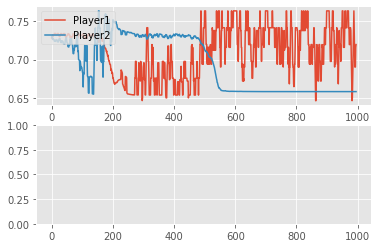

In [6]:
create_acc_loss_graph(model_name)

In [7]:
print(torch.argmax(brain[0][2]))
print(log)

tensor(6)
Clubs 0 tensor(3)
1300200
79
30
100
600900
140
7Game: 10
-3Total score:2
0.9998020529747009Confidence:9.304788477493275e-07
0.7631507515907288Loss on Bid:0.6586141586303711



In [8]:
torch.tensor([1,2,3])*5

tensor([ 5, 10, 15])

In [9]:
smooth([1,2,3,4,5,6,7,8,9],3)

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [10]:
rando = buildDeck()
yatta = [[],[]]
for i in range(4):
    yatta[0].append(rando.pop((3-i)*13+1))
    yatta[1].append(rando.pop((3-i)*13+2))

In [11]:
deck = buildDeck()
reference = deck.copy()
shuffle(deck)
spacer = Card(0,"None","Spacer")
player = [[],[]]
tricks = [[],[]]
score = [0,0]
suit = -1
index = -1
'''Dealing Cards'''
for i in range(2):
    for j in range(len(player)):
        for k in range(2):
            player[j].append(deck.pop(0))
trump = player[0][0].suit
joker.suit = trump
highValue = -1
highPlayer = -1
lowValue = 2000
lowPlayer = -1
pointsTaken = []
'''Find High and Low'''
for i in range(len(player)):
    for card in player[i]:
        if (card.suit == trump or card.suit == "None") and card.value < lowValue:
            lowValue = card.value
            lowPlayer = i
            #print(lowValue)
        if (card.suit == trump or card.suit == "None") and card.value > highValue:
            highValue = card.value
            highPlayer = i
            #print(highValue)
printDeck(player[0])
print()
printDeck(player[1])
'''START OF PLAY'''
possiblities = 0
def calculateScore(hand,game,turn,trump,cardPlayed,leader,tricks):
    game[0]+=1
    if game[0]%1000 == 0:
        print(game[0]//1000)
    possible = 0
    unique = 0
    cardFollowed = None
    canFollow = False
    player = (leader + turn) % 2
    if turn == 0:
        #print('a',end="")
        for i in range(len(hand[player])):
            if hand[player][i].suit == trump:
                newHand = [list(hand[0]),list(hand[1])]
                cardPlayed = newHand[player].pop(i)
                #newHand[player].insert(i,spacer)
                game[16] += str(cardPlayed.index)+',' 
                possible += calculateScore(newHand,game,turn+1,trump,cardPlayed,leader,tricks)
    elif turn % 2 == 0 and len(hand[player]) != 0:
        #print('b',end="")
        for i in range(len(hand[player])):
            newHand = [list(hand[0]),list(hand[1])]
            cardPlayed = newHand[player].pop(i)
            #newHand[player].insert(i,spacer)
            game[16] += str(cardPlayed.index)+',' 
            possible += calculateScore(newHand,game,turn+1,trump,cardPlayed,leader,tricks)
    elif turn % 2 == 1 and len(hand[player]) != 0:
        for i in range(len(hand[player])):
            if hand[player][i].suit == cardPlayed.suit or hand[player][i].suit == trump:
                #print('c',end="")
                canFollow = True
                newHand = [list(hand[0]),list(hand[1])]
                cardFollowed = newHand[player].pop(i)
                #newHand[player].insert(i,spacer)
                trick = [cardPlayed,cardFollowed]
                power,change = compare(trick,trump)
                tricks[(change+leader)%2] += trick
                game[16] += str(cardFollowed.index)+',' 
                possible += calculateScore(newHand,game,turn+1,trump,"None",(leader+change)%2,tricks)
        if canFollow == False:
            #print('d',end="")
            for i in range(len(hand[player])):
                newHand = [list(hand[0]),list(hand[1])]
                cardFollowed = newHand[player].pop(i)
                #newHand[player].insert(i,spacer)
                trick = [cardPlayed,cardFollowed]
                tricks[leader]+= trick
                game[16] += str(cardFollowed.index)+',' 
                possible += calculateScore(newHand,game,turn+1,trump,"None",leader,tricks)
    if turn == 7:
        #print('e',end="")
        round_score = [0,0]
        round_score[lowPlayer] += 1
        round_score[highPlayer] += 1

        #jack and joker

        for i in range(2):
            for card in tricks[i]:
                if card.suit == trump and card.value == 11:
                    round_score[i] += 1
                elif card.value == 10.5:
                    round_score[i] += 1

        #print(score)

        gamee = [0,0]
        for i in range(2):
            for card in tricks[i]:
                if card.value == 14:
                    gamee[i]+= 4
                elif card.value == 13:
                    gamee[i]+= 3
                elif card.value == 12:
                    gamee[i]+= 2
                elif card.value == 11:
                    gamee[i]+= 1
                elif card.value == 10:
                    gamee[i]+= 10
        highGame = -1
        gamePlayer = -1
        noGame = False
        indx = 0
        for g in gamee:
            if g > highGame:
                highGame = g
                gamePlayer = indx
                noGame = False
            elif g == highGame:
                noGame = True
            indx += 1
        if not noGame:
            round_score[gamePlayer] += 1
        game[1]+=1    
        game[cardPlayed.value]+=1
        game[cardFollowed.value]+=1
        return round_score[0]+round_score[1]/100000 + 1000000
    #print('f')
    game[15][turn] += 1
    return possible

game = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[0,0,0,0,0,0,0,0,0,0,0,0],'']
helper =calculateScore(player,game,0,trump,trump,0,tricks)
print(helper)
print(game[0],game[1])
print(helper//1/(helper//1000000)-1000000,(helper-(helper//1))*100000/(helper//1000000))
print(game[2:])

'''
player = [[],[]]
for i in range(1):
    for j in range(len(player)):
        for k in range(6):
            player[j].append(reference.pop(0))

printDeck(player[0])
print()
printDeck(player[1])
game[14]+=1
helper = calculateScore(player,game,0,trump,trump,0,tricks)
print(helper)
print(game[0],game[1])
print(helper//1/(helper//10000)-10000,(helper-(helper//1))*1000/(helper//10000))
print(game[2:])
''';
#stop

Eight of Spades
King of Spades
Ten of Spades
Ten of Clubs

Two of Diamonds
Two of Hearts
Nine of Clubs
Four of Diamonds
1
324000972.0
1294 324
3.0 0.0
[192, 0, 96, 0, 0, 0, 60, 36, 204, 0, 0, 60, 0, [1, 3, 12, 36, 90, 180, 324, 0, 324, 0, 0, 0], '7,40,12,14,9,34,35,42,42,35,34,35,34,9,42,34,9,14,35,42,42,35,14,35,14,9,42,42,9,14,42,9,14,35,34,34,35,14,35,34,9,14,9,14,12,34,35,42,42,35,34,35,34,12,42,34,12,14,35,42,42,35,14,35,14,12,42,42,12,14,42,12,14,35,34,34,35,14,35,34,12,14,35,34,12,14,9,42,42,9,14,9,14,12,42,42,12,14,14,12,40,9,34,35,42,42,35,34,35,34,9,42,34,9,40,35,42,42,35,40,35,40,9,42,42,9,40,42,9,40,35,34,34,35,40,35,34,9,40,9,40,12,34,35,42,42,35,34,35,34,12,42,34,12,40,35,42,42,35,40,35,40,12,42,42,12,40,42,12,40,35,34,34,35,40,35,34,12,40,35,34,12,40,9,42,42,9,40,9,40,12,42,42,12,40,34,12,40,9,14,35,42,42,35,14,35,14,9,42,42,9,14,14,9,40,35,42,42,35,40,35,40,9,42,42,9,40,42,9,40,35,14,14,35,40,35,40,9,14,14,9,40,9,40,12,14,35,42,42,35,14,35,14,12,42,42,12,14,14,12,40,35,

In [12]:
strong = game[16].split(sep = ",")
wonner = [strong[2*i] for i in range(4)]
tree = ['','','','','','','','']
level = 0
for s in strong:
    if s in wonner:
        tree[level] += s
        level += 1
    

IndexError: list index out of range

In [15]:
struct = []
for i in game[16]:
    struct.append(i)
print(len(struct))
def treePrint(oak,level):
    if level == 0:
        return
    joy = len(oak)
    heres = oak.pop(0)
    print(*heres, sep = (" "*(2^joy-1)))
    treePrint(oak,level-1)
#treePrint(struct,len(struct))

3669


In [16]:
newHand = list(player)
cardPlayed = newHand[0].pop(0)
print(len(newHand[0]),len(player[0]))

3 3


In [17]:
print(len(hand[1]),turn,trump,cardPlayed.suit,leader,len(tricks[0]))

NameError: name 'hand' is not defined

In [18]:
def mine():
    return 1,3

In [19]:
print(mine()+mine())

(1, 3, 1, 3)


In [20]:
chr(97)

'a'

In [21]:
for i in range(20):
    deck = buildDeck()
    reference = deck.copy()
    shuffle(deck)
    player = [[],[]]
    suit = -1
    index = -1
    '''Dealing Cards'''
    for i in range(2):
        for j in range(len(player)):
            for k in range(3):
                player[j].append(deck.pop(0))
    for i in range(2):
        sort(player[i])
    '''
    Bidding
    '''
    for p in player:
        printDeck(p)
        print()
    '''Redeal'''
    trump = input("What Suit")
    record += str(bidWinner) + " "+ trump + "\n\n"
    suitsDict["None"] = suitsDict[trump]
    trash = []
    redeal = [0,0]
    x = 0
    for hand in player:
        for i in range(len(hand)):
            if(hand[i].suit != trump and hand[i].suit != "None"):
                trash.append(hand.pop(i))
                hand.insert(i,deck.pop(0))
                redeal[x] += 1
        x+=1
    for p in player:
        printHand(p)
        print()
        for c in p:
            if c.suit == trump:
                trumpCount+=1
            if c.value >= 10:
                pointCount+=1
                
    print("Trump Count:",trumpCount,"\n","Point Count:",pointCount,"\n")
            
    

Nine of Diamonds
Ace of Hearts
King of Clubs
King of Spades
Ten of Diamonds
Two of Spades

Nine of Clubs
Five of Hearts
Eight of Spades
Four of Hearts
Eight of Diamonds
Six of Spades

What Suitspades


NameError: name 'record' is not defined

In [22]:
count = 0
for i in range(53//2):
    count = 0
    for j in range(53):
        if j % (i+1) == 0:
            print(j,end = " ")
            count += 1
    print("\n"+str(count),i+1,"\n")
        

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 
53 1 

0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 
27 2 

0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 
18 3 

0 4 8 12 16 20 24 28 32 36 40 44 48 52 
14 4 

0 5 10 15 20 25 30 35 40 45 50 
11 5 

0 6 12 18 24 30 36 42 48 
9 6 

0 7 14 21 28 35 42 49 
8 7 

0 8 16 24 32 40 48 
7 8 

0 9 18 27 36 45 
6 9 

0 10 20 30 40 50 
6 10 

0 11 22 33 44 
5 11 

0 12 24 36 48 
5 12 

0 13 26 39 52 
5 13 

0 14 28 42 
4 14 

0 15 30 45 
4 15 

0 16 32 48 
4 16 

0 17 34 51 
4 17 

0 18 36 
3 18 

0 19 38 
3 19 

0 20 40 
3 20 

0 21 42 
3 21 

0 22 44 
3 22 

0 23 46 
3 23 

0 24 48 
3 24 

0 25 50 
3 25 

0 26 52 
3 26 



In [23]:
printDeck(sort(buildDeck()))

Joker
Two of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Spades
Three of Spades
Four of Spades
Five of Spades
Six of Spades
Seven of Spades
Eight of Spades
Nine of Spades
Ten of Spades
Two of Hearts
Three of Hearts
Four of Hearts
Five of Hearts
Six of Hearts
Seven of Hearts
Eight of Hearts
Nine of Hearts
Ten of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts
Ace of Hearts
Two of Clubs
Three of Clubs
Four of Clubs
Five of Clubs
Six of Clubs
Seven of Clubs
Eight of Clubs
Nine of Clubs
Ten of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Clubs
Two of Diamonds
Three of Diamonds
Four of Diamonds
Five of Diamonds
Six of Diamonds
Seven of Diamonds
Eight of Diamonds
Nine of Diamonds
Ten of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Diamonds
